# Week 2

In [2]:
from Algs_scratch import *

In [3]:
def func_x(x):
    return - x**5 - 2*x + 1

In [4]:
%%time
bisection(-2, 2, func_x)


CPU times: user 7 µs, sys: 1e+03 ns, total: 8 µs
Wall time: 11.7 µs


In [5]:
%%time
secant_method(func_x, 0, 0.2)

CPU times: user 23 µs, sys: 4 µs, total: 27 µs
Wall time: 31 µs


(0.486389035934543, 6)

In [6]:
%%time
Newton_Raphson(func_x, 0.2)

CPU times: user 27 µs, sys: 4 µs, total: 31 µs
Wall time: 36 µs


(0.4863890252475381, 8)

# Week 3

## bruteforce or scipy.optimize

In [7]:
import numpy as np
import scipy.optimize as opt
from scipy.optimize import minimize


In [8]:
def f(x):
    return x**6 - x**5 + x**4 - 7*x**3 + x**2 + x -5

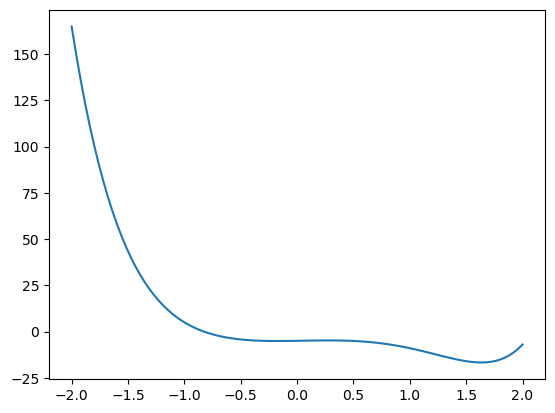

In [9]:
def matplotlib_display():
    import matplotlib.pyplot as plt 
    x = np.linspace(-2, 2, 100)
    plt.plot(x, f(x))
    plt.show()
matplotlib_display()

In [10]:
minfx = minimize(f, 0, method='BFGS', options={'disp': True})
minimizescalar = opt.minimize_scalar(f, method='brent')
print(minfx)


Optimization terminated successfully.
         Current function value: -5.105749
         Iterations: 5
         Function evaluations: 14
         Gradient evaluations: 7
  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -5.105749483553248
        x: [-1.729e-01]
      nit: 5
      jac: [-5.960e-08]
 hess_inv: [[ 1.024e-01]]
     nfev: 14
     njev: 7


In [11]:
%%time
def df(x):
    return 6*x**5 - 5*x**4 + 4*x**3 - 21*x**2 + 2*x + 1
    
minfx = opt.root_scalar(df, method='newton', x0=1.4)
print(f"""
    Newton-Raphson: 
    {minfx}
    """)


    Newton-Raphson: 
          converged: True
           flag: converged
 function_calls: 14
     iterations: 7
           root: 1.6351292084233693
    
CPU times: user 4.86 ms, sys: 144 µs, total: 5 ms
Wall time: 4.62 ms


In [12]:
def get_derivative_f(x, func, tol=1e-6):
    return (func(x + tol) - func(x-tol)) / (2*tol)

In [13]:
%%time
def BruteForce(func, range, steps, tol=1e-6):
    x = np.linspace(range[0], range[1], steps)
    y = func(x)
    min_index = np.argmin(y)
    max_index = np.argmax(y)
    x_min = x[min_index]
    x_max = x[max_index]
    return {
        'min': {
            'x': x_min,
            'y': y[min_index]
        },
        'max': {
            'x': x_max,
            'y': y[max_index]
        }
    }

BruteForce(f, [-10,10], 1000)

CPU times: user 0 ns, sys: 2.78 ms, total: 2.78 ms
Wall time: 1.9 ms


{'min': {'x': 1.631631631631631, 'y': -16.720848456833032},
 'max': {'x': -10.0, 'y': 1117085.0}}

## x = [x1,x2]

$$
x \in \left[ 0, 1 \right]^2
$$

In [14]:
A = np.random.rand(2,2)
C = np.random.rand(2,1)
D = np.random.rand(1,1)
print(A)
print(C)
print(D)
X = np.random.rand(2,1)

[[0.34507169 0.52503626]
 [0.58539422 0.23633781]]
[[0.36879038]
 [0.89460424]]
[[0.27714369]]


In [15]:
def f(x):
    return x.T @ A @ x + C.T @ x + D

def test():
    x=np.random.rand(2,1)
    return x, f(x)

def df(x, tol=1e-6):
    return ((f(x + tol) - f(x-tol)) / (2*tol))
df(X).shape

(1, 1)

In [16]:
import scipy.misc as misc
misc.derivative(f, X)

/tmp/ipykernel_7659/432769170.py:2: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  misc.derivative(f, X)


array([[2.00048849]])

In [17]:
minfx = opt.minimize(f, X.reshape(-1), method='BFGS', options={'disp': True})

         Current function value: -128184.282825
         Iterations: 2
         Function evaluations: 351
         Gradient evaluations: 113


/home/nyanmaruk/anaconda3/lib/python3.11/site-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


# Week4

## find f'

In [18]:
n = np.random.randint(1, 10)
n


7

In [19]:
params = np.random.rand(n)
params

array([0.15853167, 0.59988024, 0.46399917, 0.154855  , 0.43995431,
       0.48908579, 0.53081184])

In [20]:
coordinates = []
for i in range(n):
    x = np.random.randint(0,10) 
    y = np.random.randint(0,10)
    coordinates.append((x,y))
coordinates = np.array(coordinates)
coordinates

array([[3, 8],
       [2, 5],
       [8, 1],
       [5, 0],
       [3, 4],
       [1, 1],
       [6, 0]])

[-9.30568407e+04  2.16353280e+05 -1.84297260e+05  7.51540298e+04
 -1.57031732e+04  1.61558891e+03 -6.46248897e+01]


/home/nyanmaruk/anaconda3/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


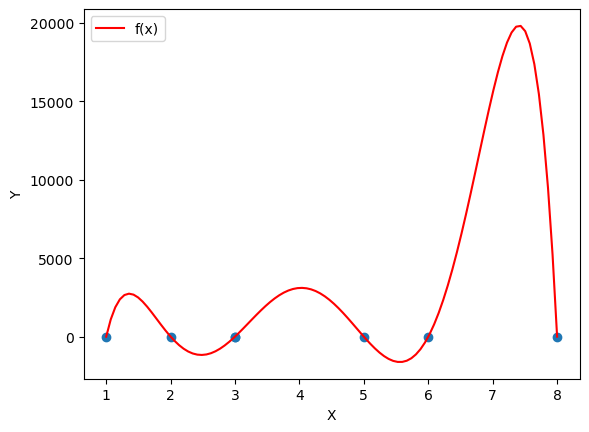

In [21]:
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

x = coordinates[:, 0]
y = coordinates[:, 1]

def target_function(x, *params):
    # result_f = 0
    # for i in range(len(params)):
    #     result_f += params[i] * x**i
    return sum([params[i] * x**i for i in range(len(params))])

fit_params, pcov = curve_fit(target_function, x, y, p0=params.tolist())
print(fit_params)

x_new = np.linspace(min(x), max(x), 100)

y_new = target_function(x_new, *fit_params)    # Create an coordinate


plt.scatter(x, y)
plt.plot(x_new, y_new, label='f(x)', color='red')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [22]:
def df(x, tol = 1e-6):
    return ((target_function((x + tol), *fit_params) - target_function((x-tol), *fit_params)) / (2*tol))

In [23]:
df(1)

18098.352333055347

## Homework

ktra co phai toi uu loi khong (Check is convex)
sd phuong phap roi rac hoa de giai
$$
    f_i(x_i) = x_i.\log_2{(1+\frac{a_i}{x_i})} + \frac{1}{r_i}.\log_2{(1 + b_i.x_i)}
$$

hai ham thanh phan deu phu thuoc vao 1 bien

=> ap dung tong hai ham loi la ham loi

=> chung minh cac ham thanh phan la loi

ddf>0 la ham loi

In [24]:
import numpy as np
from scipy.optimize import minimize

def f(x, a, r, b):
    return x*np.log2(a/x) + (1/r)*np.log2(1 + b*x)

def df(x, a, r, b, tol=1e-6):
    return ((f(x + tol, a, r, b) - f(x-tol, a, r, b)) / (2*tol))

def df2(x, a, r, b, tol=1e-6):
    return ((df(x + tol, a, r, b) - df(x-tol, a, r, b)) / (2*tol))

a = np.random.rand()
r = np.random.rand()
b = np.random.rand()

x0 = np.random.rand()
x0
def hessian_matrix(x, a, r, b, tol=1e-6):
    hessian = np.zeros((1, 1))
    f_x = df(x, a, r, b, tol)
    f_x_plus_h = df(x + tol, a, r, b, tol)
    f_x_minus_h = df(x - tol, a, r, b, tol)
    second_derivative = (f_x_plus_h - 2 * f_x + f_x_minus_h) / (tol ** 2)
    hessian[0, 0] = second_derivative
    return hessian

hessian_matrix_result = hessian_matrix(x0, a, r, b)
print("Hessian Matrix:")
print(hessian_matrix_result)
minfx = minimize(f, x0, args=(a, r, b), method='BFGS', options={'disp': True})
minfx

Hessian Matrix:
[[166.53345369]]
         Current function value: nan
         Iterations: 2
         Function evaluations: 246
         Gradient evaluations: 123


/tmp/ipykernel_7659/1492801064.py:5: RuntimeWarning: invalid value encountered in log2
  return x*np.log2(a/x) + (1/r)*np.log2(1 + b*x)
/tmp/ipykernel_7659/1492801064.py:5: RuntimeWarning: invalid value encountered in log2
  return x*np.log2(a/x) + (1/r)*np.log2(1 + b*x)
/home/nyanmaruk/anaconda3/lib/python3.11/site-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: nan
        x: [-1.695e+05]
      nit: 2
      jac: [       nan]
 hess_inv: [[-1.705e+01]]
     nfev: 246
     njev: 123

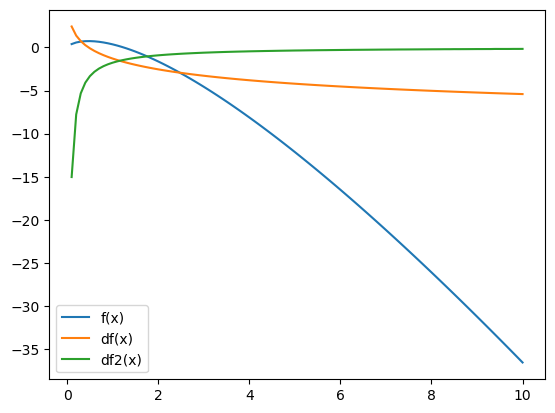

In [25]:
def visualize():
    import matplotlib.pyplot as plt
    x = np.linspace(0.1, 10, 100)
    plt.plot(x, f(x, a, r, b))
    plt.plot(x, df(x, a, r, b))
    plt.plot(x, df2(x, a, r, b))
    plt.legend(['f(x)', 'df(x)', 'df2(x)'])
    plt.show()
visualize()

## multi variables

In [26]:
n = np.random.randint(1, 10)
print(n)
# n =1
x0 = np.random.rand(n)
a = np.random.rand(n)
r = np.random.rand(n)
b = np.random.rand(n)
print(x0)

def d_multi_variables(x,a,r,b):
    return np.sum([f(xi,a,r,b) for xi in x])

cons = [{'type': 'ineq', 'fun': lambda: d_multi_variables < 1.0},
        {'type': 'ineq', 'fun': lambda: d_multi_variables > 0.001}]

d_multi_variables(x0,a,r,b)
minfx = minimize(d_multi_variables, x0, args=(a, r, b), method='BFGS'
                 , options={'disp': True}, constraints=cons)
minfx

6
[0.91100122 0.80497881 0.02222821 0.26414309 0.99663471 0.12356062]


/home/nyanmaruk/anaconda3/lib/python3.11/site-packages/scipy/optimize/_minimize.py:576: RuntimeWarning: Method BFGS cannot handle constraints.
  warn('Method %s cannot handle constraints.' % method,
/tmp/ipykernel_7659/1492801064.py:5: RuntimeWarning: invalid value encountered in log2
  return x*np.log2(a/x) + (1/r)*np.log2(1 + b*x)
/tmp/ipykernel_7659/1492801064.py:5: RuntimeWarning: invalid value encountered in log2
  return x*np.log2(a/x) + (1/r)*np.log2(1 + b*x)


         Current function value: nan
         Iterations: 1
         Function evaluations: 784
         Gradient evaluations: 112


/tmp/ipykernel_7659/1492801064.py:5: RuntimeWarning: invalid value encountered in log2
  return x*np.log2(a/x) + (1/r)*np.log2(1 + b*x)
/home/nyanmaruk/anaconda3/lib/python3.11/site-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: nan
        x: [-3.587e+02 -3.702e+02 -5.084e+02 -4.443e+02 -3.499e+02
            -4.726e+02]
      nit: 1
      jac: [       nan        nan        nan        nan        nan
                   nan]
 hess_inv: [[1 0 ... 0 0]
            [0 1 ... 0 0]
            ...
            [0 0 ... 1 0]
            [0 0 ... 0 1]]
     nfev: 784
     njev: 112

# Week5

$$
    \sum_{i-1}^M ||f_i{(x_i)}||_p \\
\max  a^TX \\
\text{s.t } Ax <= b
$$

In [27]:
import numpy as np
def f(x):
    return x**2 + 1

n = np.random.randint(1,10)
print("Dimesion: ", n)
X = np.random.rand(n)
print("Variables",X)
func_values = np.array([f(x) for  x in X])
print("Value of objective function",sum(func_values))
p = np.random.randint(1,10)
print("Norm p: ",p)

def Obj_func(X, func):
    return np.sum([func(x) for x in X])
print(Obj_func(X,f))



Dimesion:  5
Variables [0.39435012 0.3550061  0.36620083 0.61208957 0.8975575 ]
Value of objective function 6.595907506259541
Norm p:  7
6.595907506259541


In [28]:
np.linalg.norm(f(X),p)

1.8677922232903859

# Week6

## Solve
$$\text{min }x^TQx$$ 
$$\text{st } Ax \leq b$$

In [60]:
import numpy as np
from scipy.optimize import minimize
# seed = 10
# np.random.seed(seed)

n = np.random.randint(1, 10)
n = 2
print("Dimension:", n)

x = np.random.rand(n)
print("Variables:", x)

Q = np.random.rand(n, n)
def checkQ(Q):
    if np.all(np.linalg.eigvals(Q) >= 0) and np.allclose(Q, Q.T):
        return True
    else:
        return False
# print(f"Q is (semi) positive matrix {np.linalg.eigvals(Q)}")

while not checkQ(Q):
    Q = np.random.rand(n, n)

Dimension: 2
Variables: [0.59951448 0.79743766]


In [65]:
cons = ({'type': 'ineq',
            'fun': lambda x: np.array([np.sum(x) - 1]),
            'jac': lambda x: np.array([1.0]*len(x))})
print("f(x) = x^T Q x", Q, f(x))
print(x.shape)
minfx = minimize(f, x, method='SLSQP', options={'disp': True}, constraints=cons)

f(x) = x^T Q x [[0.76688995 0.51437334]
 [0.5143715  0.53309526]] 1.1064503009122224
(2,)
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.5318028806663619
            Iterations: 4
            Function evaluations: 12
            Gradient evaluations: 4


In [62]:
def f(x):
    """Quy hoach toan phuong"""
    return x.T @ Q @ x

def solve(x, package):
    if package == 'scipy':
        cons = ({'type': 'ineq',
                 'fun': lambda x: np.array([np.sum(x) - 1]),
                 'jac': lambda x: np.array([1.0]*len(x))})
        minfx = minimize(f, x, method='SLSQP', options={'disp': True}, constraints=cons)
        return minfx
    elif package == 'cvxpy':
        import cvxpy as cp
        y = cp.Variable(n)
        objective = cp.Minimize(f(y))
        constraints = [cp.sum(y) == 1]
        prob = cp.Problem(objective, constraints)
        result = prob.solve()
        return result
    elif package == 'gekko':
        from gekko import GEKKO
        m = GEKKO(remote=False)
        x_1 = m.Var(value=x[0])
        x_2 = m.Var(value=x[1])
        m.Equation(x_1 + x_2 == 1)
        def formulate(x_1,x_2, Q):
            return x_1**2*Q[0,0] + x_1*x_2*Q[0,1] + x_2*x_1*Q[1,0] + x_2**2*Q[1,1]

        m.Obj(formulate(x_1,x_2,Q))
        m.solve(disp=False)
        return m.options.OBJFCNVAL, [x_1.value[0], x_2.value[0]]
    elif package == 'cvxopt':
        from cvxopt import matrix, solvers
        P = matrix(Q)
        q = matrix(np.zeros((n, 1)))
        G = matrix(np.ones((1, n)))
        h = matrix(np.ones((1, 1)))
        A = matrix(np.ones((1, n)))
        b = matrix(np.ones((1, 1)))
        sol = solvers.qp(P, q, G, h, A, b)
        # print(sol['x'])
        # print(sol)
        return sol['x']
    else:
        raise ValueError("Package is not supported")
    

import time
start = time.time()
print("------------------------Solve by scipy------------------------")
print(solve(x, 'scipy'))
scipy_end = time.time()
print("------------------------Solve by cvxpy------------------------")
print(solve(x, 'cvxpy'))
cvxpy_end = time.time()
print("------------------------Solve by gekko------------------------")
print(solve(x, 'gekko'))
gekko_end = time.time()
print("------------------------Solve by cvxopt------------------------")
print(solve(x, 'cvxopt'))
cvxopt_end = time.time()

------------------------Solve by scipy------------------------
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.5318028806663619
            Iterations: 4
            Function evaluations: 12
            Gradient evaluations: 4
 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.5318028806663619
       x: [ 6.903e-02  9.310e-01]
     nit: 4
     jac: [ 1.064e+00  1.064e+00]
    nfev: 12
    njev: 4
------------------------Solve by cvxpy------------------------
0.5318028806686974
------------------------Solve by gekko------------------------
(0.53180288067, [0.069026731417, 0.93097326858])
------------------------Solve by cvxopt------------------------
     pcost       dcost       gap    pres   dres
 0:  2.6590e-01  2.6590e-01  1e+00  1e+00  1e+00
 1:  2.6590e-01  2.6590e-01  1e-02  1e-02  1e-02
 2:  2.6590e-01  2.6590e-01  1e-04  1e-04  1e-04
 3:  2.6590e-01  2.6590e-01  1e-06  1e-06  1e-06
 4:  2.6590e-01  2.

In [65]:
# print(x_1.value, x_2.value)
# print(m.options.OBJFCNVAL)

In [77]:
print(
    """
    Time to solve by scipy: {}
    Time to solve by cvxpy: {}
    Time to solve by gekko: {}
    Time to solve by cvxopt: {}
    """.format(scipy_end - start, cvxpy_end - scipy_end, gekko_end - cvxpy_end, cvxopt_end - gekko_end)
)


    Time to solve by scipy: 0.0030553340911865234
    Time to solve by cvxpy: 0.011956214904785156
    Time to solve by gekko: 0.04036092758178711
    Time to solve by cvxopt: 0.0016486644744873047
    


In [79]:
optimal_value = {
    "scipy": solve(x, 'scipy').fun,
    "cvxpy": solve(x, 'cvxpy'),
    "gekko": solve(x, 'gekko')[0],
    "cvxopt": solve(x, 'cvxopt').T @ Q @ solve(x, 'cvxopt')
}

print(optimal_value)

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.08349017565203241
            Iterations: 3
            Function evaluations: 9
            Gradient evaluations: 3
     pcost       dcost       gap    pres   dres
 0:  4.1745e-02  4.1745e-02  1e+00  1e+00  1e+00
 1:  4.1745e-02  4.1745e-02  1e-02  1e-02  1e-02
 2:  4.1745e-02  4.1745e-02  1e-04  1e-04  1e-04
 3:  4.1745e-02  4.1745e-02  1e-06  1e-06  1e-06
 4:  4.1745e-02  4.1745e-02  1e-08  1e-08  1e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  4.1745e-02  4.1745e-02  1e+00  1e+00  1e+00
 1:  4.1745e-02  4.1745e-02  1e-02  1e-02  1e-02
 2:  4.1745e-02  4.1745e-02  1e-04  1e-04  1e-04
 3:  4.1745e-02  4.1745e-02  1e-06  1e-06  1e-06
 4:  4.1745e-02  4.1745e-02  1e-08  1e-08  1e-08
Optimal solution found.
{'scipy': 0.08349017565203241, 'cvxpy': 0.08349010316978102, 'gekko': 0.083490103168, 'cvxopt': array([[0.0834901]])}


In [74]:
optimal_point = {
    "scipy": solve(x, 'scipy').x,
    "cvxpy": solve(x, 'cvxpy'),
    "gekko": solve(x, 'gekko')[1],
    "cvxopt": [solve(x, 'cvxopt')[0], solve(x, 'cvxopt')[1]]
}

print(optimal_point)

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.08349017565203241
            Iterations: 3
            Function evaluations: 9
            Gradient evaluations: 3
     pcost       dcost       gap    pres   dres
 0:  4.1745e-02  4.1745e-02  1e+00  1e+00  1e+00
 1:  4.1745e-02  4.1745e-02  1e-02  1e-02  1e-02
 2:  4.1745e-02  4.1745e-02  1e-04  1e-04  1e-04
 3:  4.1745e-02  4.1745e-02  1e-06  1e-06  1e-06
 4:  4.1745e-02  4.1745e-02  1e-08  1e-08  1e-08
Optimal solution found.
[-2.89e-01]
[ 1.29e+00]

{'x': <2x1 matrix, tc='d'>, 'y': <1x1 matrix, tc='d'>, 's': <1x1 matrix, tc='d'>, 'z': <1x1 matrix, tc='d'>, 'status': 'optimal', 'gap': 1.0000000002765356e-08, 'relative gap': 2.395480988044613e-07, 'primal objective': 0.04174526975030653, 'dual objective': 0.041745269750306686, 'primal infeasibility': 1.0000000161269895e-08, 'dual infeasibility': 1.4142135694791778e-08, 'primal slack': 1.0000000000000037e-08, 'dual slack': 1.000000000276532, 'i

In [3]:
# import numpy as np
arr = np.array([1, 2, 3, 1, 0.5])  # Example array
is_semi_positive = np.all(np.greater_equal(arr, 0))
print(f"Is all elements semi-positive? {is_semi_positive}")


Is all elements semi-positive? True


In [89]:
class Solver():
    def __init__(self, x, Q, package='scipy'):
        self.x = x
        self.Q = Q
        self.package = package

    def checkQ(self):
        if np.all(np.linalg.eigvals(self.Q) >= 0) and np.allclose(self.Q, self.Q.T):
            return True
        else:
            return False
        
    def f(self):
        """Quy hoach toan phuong"""
        return self.x.T @ self.Q @ self.x
    
    def solve(self):
        if self.package == 'scipy':
            cons = ({'type': 'ineq',
                     'fun': lambda x: np.array([np.sum(x) - 1]),
                     'jac': lambda x: np.array([1.0]*len(x))})
            minfx = minimize(self.f, self.x, method='SLSQP', options={'disp': True}, constraints=cons)
            return minfx
        elif self.package == 'cvxpy':
            import cvxpy as cp
            y = cp.Variable(n)
            objective = cp.Minimize(self.f(y))
            constraints = [cp.sum(y) == 1]
            prob = cp.Problem(objective, constraints)
            result = prob.solve()
            return result
        elif self.package == 'gekko':
            from gekko import GEKKO
            m = GEKKO(remote = False)
            x_1 = m.Var(value = self.x[0])
            x_2 = m.Var(value = self.x[1])
            m.Equation(x_1 + x_2 == 1)
            def formulate(x_1,x_2, Q):
                return x_1**2*Q[0,0] + x_1*x_2*Q[0,1] + x_2*x_1*Q[1,0] + x_2**2*Q[1,1]
            m.Obj(formulate(x_1,x_2,self.Q))
            m.solve(disp = False)
            return m.options.OBJFCNVAL, [x_1.value[0], x_2.value[0]]
 
        elif self.package == 'cvxopt':
            from cvxopt import matrix, solvers
            P = matrix(self.Q)
            q = matrix(np.zeros((n, 1)))
            G = matrix(np.ones((1, n)))
            h = matrix(np.ones((1, 1)))
            A = matrix(np.ones((1, n)))
            b = matrix(np.ones((1, 1)))
            sol = solvers.qp(P, q, G, h, A, b)
            return sol['x']
        else:
            raise ValueError("Package is not supported")
    
    def time_to_solve(self):
        import time
        start = time.time()
        self.solve(self.package)
        end = time.time()
        return end - start
    
    def compare_time(self):
        import time
        start = time.time()
        print("------------------------Solve by scipy------------------------")
        print(solve(x,'scipy'))
        scipy_end = time.time()
        print("------------------------Solve by cvxpy------------------------")
        print(solve(x,'cvxpy'))
        cvxpy_end = time.time()
        print("------------------------Solve by gekko------------------------")
        print(solve(x,'gekko'))
        gekko_end = time.time()
        print("------------------------Solve by cvxopt------------------------")
        print(solve(x,'cvxopt'))
        cvxopt_end = time.time()

        time_cal = {
            "scipy": scipy_end - start,
            "cvxpy": cvxpy_end - scipy_end,
            "gekko": gekko_end - cvxpy_end,
            "cvxopt": cvxopt_end - gekko_end
        }

        optimal_value = {
            "scipy": solve(x,'scipy').fun,
            "cvxpy": solve(x,'cvxpy'),
            "gekko": solve(x,'gekko')[0],
            "cvxopt":solve(x,'cvxopt').T @ self.Q @ solve(x,'cvxopt')
        }

        optimal_point = {
            "scipy": solve(x,'scipy').x,
            "cvxpy": solve(x,'cvxpy'),
            "gekko": solve(x,'gekko')[1],
            "cvxopt": [solve(x,'cvxopt')[0], solve(x,'cvxopt')[1]]
        }

        return {"Time to solve": time_cal,
                "Optimal value": optimal_value,
                "Optimal Point": optimal_point}
    
    def visualize(self):
        import matplotlib.pyplot as plt
        x = np.linspace(0.1, 10, 100)
        plt.plot(x, self.f(x))
        plt.plot(x, self.df(x))
        plt.plot(x, self.df2(x))
        plt.legend(['f(x)', 'df(x)', 'df2(x)'])
        plt.show()

Solvers = Solver(x, Q, package='scipy')
results = Solvers.compare_time()


------------------------Solve by scipy------------------------
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.08349017565203241
            Iterations: 3
            Function evaluations: 9
            Gradient evaluations: 3
 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.08349017565203241
       x: [-2.888e-01  1.289e+00]
     nit: 3
     jac: [ 1.674e-01  1.671e-01]
    nfev: 9
    njev: 3
------------------------Solve by cvxpy------------------------
0.08349010316978102
------------------------Solve by gekko------------------------
(0.083490103168, [-0.28924895111, 1.2892489511])
------------------------Solve by cvxopt------------------------
     pcost       dcost       gap    pres   dres
 0:  4.1745e-02  4.1745e-02  1e+00  1e+00  1e+00
 1:  4.1745e-02  4.1745e-02  1e-02  1e-02  1e-02
 2:  4.1745e-02  4.1745e-02  1e-04  1e-04  1e-04
 3:  4.1745e-02  4.1745e-02  1e-06  1e-06  1e-06
 4:  4.1745e-02  4

In [90]:
results

{'Time to solve': {'scipy': 0.004976987838745117,
  'cvxpy': 0.01068878173828125,
  'gekko': 0.04308462142944336,
  'cvxopt': 0.0015022754669189453},
 'Optimal value': {'scipy': 0.08349017565203241,
  'cvxpy': 0.08349010316978102,
  'gekko': 0.083490103168,
  'cvxopt': array([[0.0834901]])},
 'Optimal Point': {'scipy': array([-0.28884146,  1.28884146]),
  'cvxpy': 0.08349010316978102,
  'gekko': [-0.28924895111, 1.2892489511],
  'cvxopt': [-0.2892468356298458, 1.2892468356298459]}}

# week 8

## ex.

$\text{max } min_{i = 1,...,N} log_2 \frac{a_i^Tx}{b_i^Tx} (a_i,b_i \geq 0) $

$  s.t. Ax \leq b $

$  x \geq 0 $


## solution => max T

s.t. $ log_2\frac{a_i^Tx}{b_i^Tx} \geq T$

$  Ax \leq b $

$  x \geq 0 $

In [162]:
import numpy as np 
N = np.random.randint(1,10)
M = np.random.randint(1,10)
print(N,M)
A = np.random.rand(M,N)
B = np.random.rand(N,1)
B = B.ravel()


7 9


In [235]:
a = np.random.rand(M)
b = np.random.rand(M)
x = np.random.rand(M)
print(f"""
    Matrix A shape: {A.shape}
    Matrix B shape: {B.shape}
    Vector a shape: {a.shape}
    Vector b shape: {b.shape}
    Vector x shape: {x.shape}
""")



    Matrix A shape: (9, 7)
    Matrix B shape: (7,)
    Vector a shape: (9,)
    Vector b shape: (9,)
    Vector x shape: (9,)



In [239]:
from scipy.optimize import minimize
import numpy as np

def func(x, a, b):
    return np.log2(np.divide(np.dot(a.T, x),np.dot(b.T, x)))

T = np.random.rand()

print(
func(x,a,b)
)

cons = (
    {'type': 'ineq', 'fun': lambda x: func(x, a, b) - T},
    {'type': 'ineq', 'fun': lambda x: np.dot(A.T, x) - B},
    {'type': 'ineq', 'fun': lambda x: x})

res = minimize(func, x, args=(a, b), constraints=cons)

-0.5411863919752093


In [240]:
print(res)

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.884206711914999
       x: [ 4.849e-01  1.383e+00  5.720e-04  1.777e-01  4.068e-01
            9.658e-01  8.355e-04  5.527e-01  1.083e+00]
     nit: 5
     jac: [-2.985e-01  2.516e-01 -4.123e-01 -6.740e-01 -2.155e-01
           -2.258e-01 -5.884e-01  1.132e-02  2.002e-01]
    nfev: 50
    njev: 5


In [234]:
from gekko import GEKKO

m = GEKKO(remote=False)
x_1 = m.Var(value=x[0])
x_2 = m.Var(value=x[1])
m.Equation(x_1 + x_2 == 1)
def formulate(a, b):
    return np.log2(np.divide(np.dot(a.T, x),np.dot(b.T, x)))

m.Obj(formulate(a,b))
m.solve(disp=False)
m.options.OBJFCNVAL

-0.49043335145

In [1]:
# convexification

# min||A - VM||
$
A_{mxn} = V_{nxk}. N_{kxm}
$

In [7]:
import numpy as np
n_samples, n_features = 100, 50
A = np.random.rand(n_samples, n_features)
# A = np.random.randint(-1, 2, (n_samples, n_features))
from sklearn.decomposition import NMF
model = NMF(n_components=2, init='random', random_state=42)
W = model.fit_transform(A)
H = model.components_

original_space = np.dot(W, H)

print("Error: ", np.linalg.norm(A - original_space))
from sklearn.metrics import mean_squared_error
print("Error: ", mean_squared_error(A, original_space))

Error:  19.540842188046206
Error:  0.07636890268362528


/home/nyanmaruk/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


In [5]:
def NMF(A, n_components, max_iter=1000, tol=1e-6):
    n_samples, n_features = A.shape
    W = np.random.rand(n_samples, n_components)
    H = np.random.rand(n_components, n_features)
    for i in range(max_iter):
        H = H * (W.T @ A) / (W.T @ W @ H)
        W = W * (A @ H.T) / (W @ H @ H.T)
        if np.linalg.norm(A - W @ H) < tol:
            break
    return W, H

W, H = NMF(A, 2)
print("Error: ", np.linalg.norm(A - W @ H))
print("Error: ", mean_squared_error(A, W @ H))

Error:  54.71711300502358
Error:  0.5987924911209039


In [4]:
A = np.random.rand(100, 50)
A = np.random.randint(-1, 2, (100, 50))
A_padding = np.pad(A, ((0, 0), (0, A.shape[1])), 'constant')
S, V, D = np.linalg.svd(A_padding)
# print(S.shape)
# print(V.shape)
# print(D.shape)
A_reconstruct = S @ np.diag(V) @ D

print("Error: ", np.linalg.norm(A_padding - A_reconstruct))
print("Error: ", mean_squared_error(A_padding, A_reconstruct))

Error:  1.4089374458157272e-13
Error:  1.9851047262217452e-30


In [54]:
class Non_negative_Matrix_Factorization():
    def __init__(self, A, n_components, max_iter=1000, tol=1e-6):
        self.A = A
        self.n_components = n_components
        self.max_iter = max_iter
        self.tol = tol

    def fit(self):
        n_samples, n_features = self.A.shape
        W = np.random.rand(n_samples, self.n_components)
        H = np.random.rand(self.n_components, n_features)
        for i in range(self.max_iter):
            H = H * (W.T @ self.A) / (W.T @ W @ H)
            W = W * (self.A @ H.T) / (W @ H @ H.T)
            if np.linalg.norm(self.A - W @ H) < self.tol:
                break
        return W, H

    def reconstruct(self, W, H):
        return W @ H

    def error(self, A, A_reconstruct):
        return np.linalg.norm(A - A_reconstruct), mean_squared_error(A, A_reconstruct)
    
    def padding(self, A):
        return np.pad(A, ((0, 0), (0, A.shape[1])), 'constant')
    
    def svd(self, A):
        return np.linalg.svd(A)
    
    def reconstruct_svd(self, S, V, D):
        return S @ np.diag(V) @ D
    
    def error_svd(self, A_padding, A_reconstruct):
        return np.linalg.norm(A_padding - A_reconstruct), mean_squared_error(A_padding, A_reconstruct)
    
    def fit_transform(self):
        W, H = self.fit()
        A_padding = self.padding(self.A)
        S, V, D = self.svd(A_padding)
        A_reconstruct = self.reconstruct_svd(S, V, D)
        return self.error_svd(A_padding, A_reconstruct)
    
    def visualize(self):
        import matplotlib.pyplot as plt
        x = np.linspace(0.1, 10, 100)
        plt.plot(x, self.f(x))
        plt.plot(x, self.df(x))
        plt.plot(x, self.df2(x))
        plt.legend(['f(x)', 'df(x)', 'df2(x)'])
        plt.show()
    
    def compare(self):
        """Compare SVD and NMF"""
        W, H = self.fit()
        A_padding = self.padding(self.A)
        S, V, D = self.svd(A_padding)
        A_reconstruct = self.reconstruct_svd(S, V, D)
        error_svd = self.error_svd(A_padding, A_reconstruct)
        error_nmf = self.error(self.A, W @ H)
        return {"SVD": error_svd, "NMF": error_nmf}

NMF = Non_negative_Matrix_Factorization(A, 2)


NMF.compare()


{'SVD': (9.530017485140003e-14, 9.082123326707419e-31),
 'NMF': (19.242655605523407, 0.07405595895055629)}